# <font color=#3A86FF>Données nutritionnelles - Exploration </font>

## Sommaire

* [Chargement des donnees](#Chargement-des-donnees)  
* [Analyses univariees](#Analyses-univariees)
    * [Tendances centrales](#Tendances-centrales)
    * [Boxplots](#Boxplots)
    * [Histogrammes](#Histogrammes)
    * [Nutrition Score et Grade](#Nutrition-Score-et-Grade)
* [Analyse Multivariee](#Analyse-Multivariee)
* [ACP](#ACP)
    * [Préparation des données](#Preparation-des-donnees)
    * [Centrage et réduction](#Centrage-et-reduction)
    * [Calcul des composantes principales](#Calcul-des-composantes-principales)
    * [Eboulis des valeurs propres](#Eboulis-des-valeurs-propres)
    * [Cercle des corrélations](#Cercle-des-correlations)
    * [Choix du plan factoriel](#Choix-du-plan-factoriel)
    * [Projection des individus](#Projection-des-individus)
* [Conclusion](#Conclusion) 

## <font color=#FB5607>Chargement des donnees</font>

In [1]:
import pandas as pd
import time

now = time.time()
df = pd.read_csv("products_clean.csv", encoding="utf-8",sep=",", low_memory=False)

In [2]:
df.head()

,categories,quantity,countries_fr,categories_tags,categories_fr,states,countries_tags,brands_tags,serving_size,countries,...,additives_fr,additives_n,cholesterol_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sugars_100g,saturated-fat_100g
0,NaN,1kg,France,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...",en:france,ferme-t-y-r-nao,NaN,en:FR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,États-Unis,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",en:united-states,NaN,28 g (1 ONZ),US,...,NaN,0.0,0.018,14.0,2243.0,3.57,64.29,28.57,14.29,28.57
2,NaN,NaN,États-Unis,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",en:united-states,torn-glasser,28 g (0.25 cup),US,...,NaN,0.0,0.000,0.0,1941.0,17.86,60.71,17.86,17.86,0.00
3,NaN,NaN,États-Unis,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",en:united-states,grizzlies,28 g (0.25 cup),US,...,NaN,0.0,NaN,12.0,2540.0,17.86,17.86,57.14,3.57,5.36
4,NaN,NaN,États-Unis,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",en:united-states,bob-s-red-mill,35 g (0.25 cup),US,...,NaN,0.0,NaN,NaN,1552.0,8.57,77.14,1.43,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   categories               84410 non-null   object 
 1   quantity                 104819 non-null  object 
 2   countries_fr             320492 non-null  object 
 3   categories_tags          84389 non-null   object 
 4   categories_fr            84411 non-null   object 
 5   states                   320726 non-null  object 
 6   countries_tags           320492 non-null  object 
 7   brands_tags              292352 non-null  object 
 8   serving_size             211331 non-null  object 
 9   countries                320492 non-null  object 
 10  additives_tags           154680 non-null  object 
 11  main_category_fr         84366 non-null   object 
 12  brands                   292360 non-null  object 
 13  main_category            84366 non-null   object 
 14  nutr

In [4]:
import numpy as np

# identification des colonnes numériques et qualitatives
colonnesNum=df.select_dtypes(np.number).columns.tolist()
colonnesQual=df.select_dtypes('O').columns.tolist()

## <font color=#FB5607>Analyses univariees</font>

### Tendances centrales

In [5]:
# echantillon de données numériques
df[colonnesNum].sample(10)

,additives_n,cholesterol_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sugars_100g,saturated-fat_100g
219957,2.0,NaN,11.0,1038.0,0.00,60.00,0.00,60.00,0.00
273260,3.0,0.016,17.0,1602.0,3.91,50.78,18.75,32.81,5.47
150348,0.0,0.000,10.0,0.0,0.00,0.00,0.00,0.00,0.00
143998,2.0,NaN,NaN,1494.0,0.00,92.86,0.00,71.43,NaN
92360,2.0,0.000,-6.0,1494.0,12.50,75.00,1.79,3.57,0.00
81642,0.0,0.000,-5.0,1393.0,20.83,62.50,0.00,8.33,0.00
176124,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210219,0.0,NaN,-4.0,387.0,6.50,13.80,0.30,0.30,0.10
204868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# tableau de tendances (mediane, moyenne, ecart-type, valeurs uniques)
df[colonnesNum].agg(['size','median','mean', 'std','nunique']).round(0)

,additives_n,cholesterol_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sugars_100g,saturated-fat_100g
size,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0
median,1.0,0.0,10.0,1100.0,5.0,21.0,5.0,6.0,2.0
mean,2.0,0.0,9.0,1142.0,7.0,32.0,13.0,16.0,5.0
std,3.0,0.0,9.0,6447.0,8.0,30.0,18.0,22.0,8.0
nunique,31.0,537.0,55.0,3997.0,2503.0,5416.0,3378.0,4068.0,2197.0


### Boxplots

In [7]:
def maskOutliers(s):
    """
    Fonction qui retourne le mask qui retourne les lignes d'une Serie, correspondant aux outliers

    Parameters
    ----------
    s : pandas Series
        une Serie de valeurs numériques

    Returns
    -------
    mask : Series
        une Serie de booleens correspondant au masque qui retourne les valeurs atypiques/Outliers
    """
    # premier Quantile
    Q1 = s.quantile(0.25)
    # 3e quantile
    Q3 = s.quantile(0.75)
    # Interquantile
    IQR = Q3 - Q1
    
    # les outliers sont toutes les valeurs qui sont inférieures à Q1-1.5*IQR et supérieure à  Q3+1.5*IQR
    mask=(s < (Q1 - 1.5 * IQR)) |(s > (Q3 + 1.5 * IQR))
    return mask

# exclusion des outliers sur les variables quantitatives
for name in colonnesNum:
    mask=maskOutliers(df[name])
    df.loc[mask,name]=0

additives_n
cholesterol_100g
nutrition-score-fr_100g
energy_100g
proteins_100g
carbohydrates_100g
fat_100g
sugars_100g
saturated-fat_100g


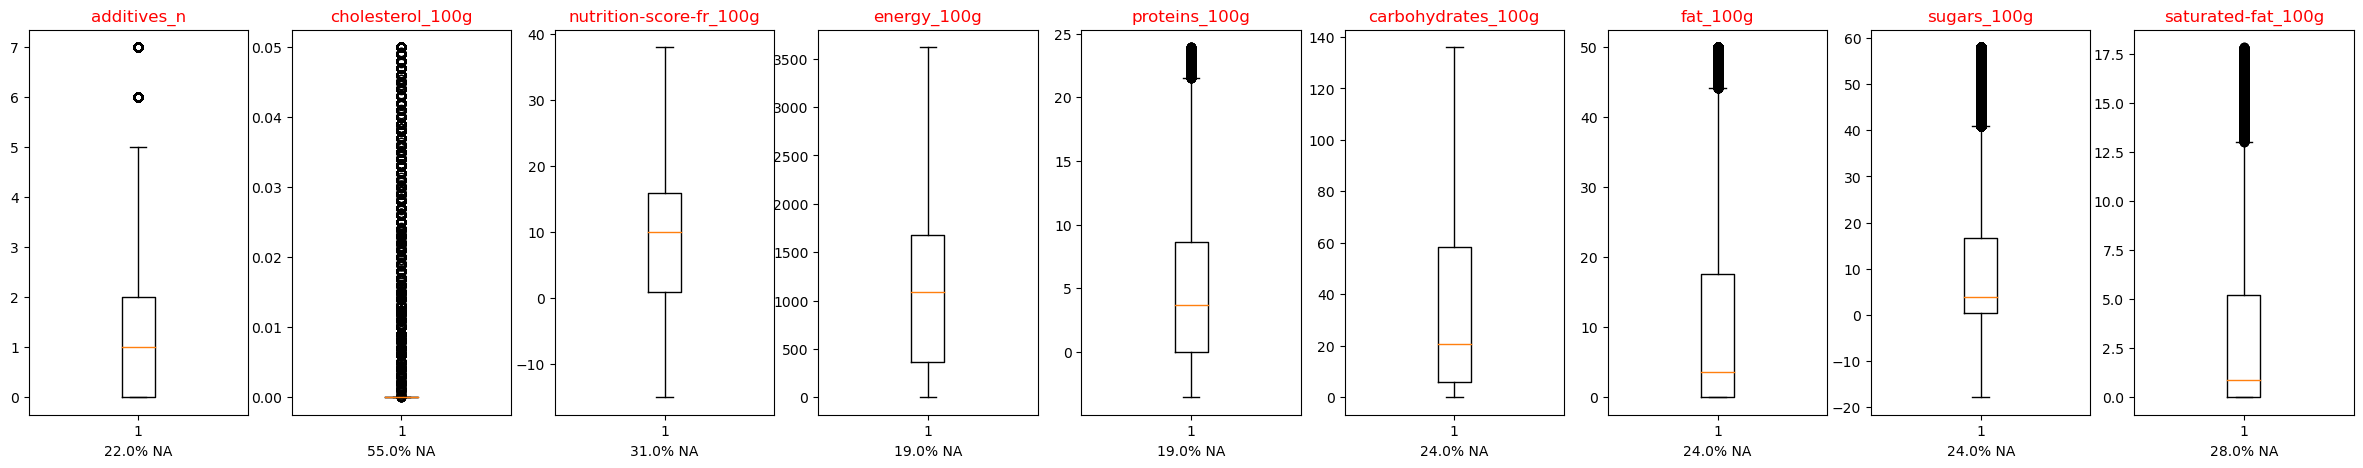

In [8]:
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.rcParams["figure.figsize"] = (100,5)

fig, axes = plt.subplots(nrows=1, ncols=9,figsize=(30,5))
axes=axes.flatten()

i=0
for x in colonnesNum:
        print(str(x)) #debug
        # on dessine le boxplot en excluant les valeurs manquantes pour chaque variable quantitative
        axes[i].boxplot(df[x].dropna())
        axes[i].set_title(x,color='red')
        axes[i].set_xlabel(str(round(100*df[x].isna().sum(axis=0)/len(df[x]),0))+'% NA')
        i+=1

On remarquera le boxplot bien équilibré du nutrition-score-fr_100g, comparé aux autres.
Ainsi que la distribution sans tendances du cholesterol_100g.

### Histogrammes

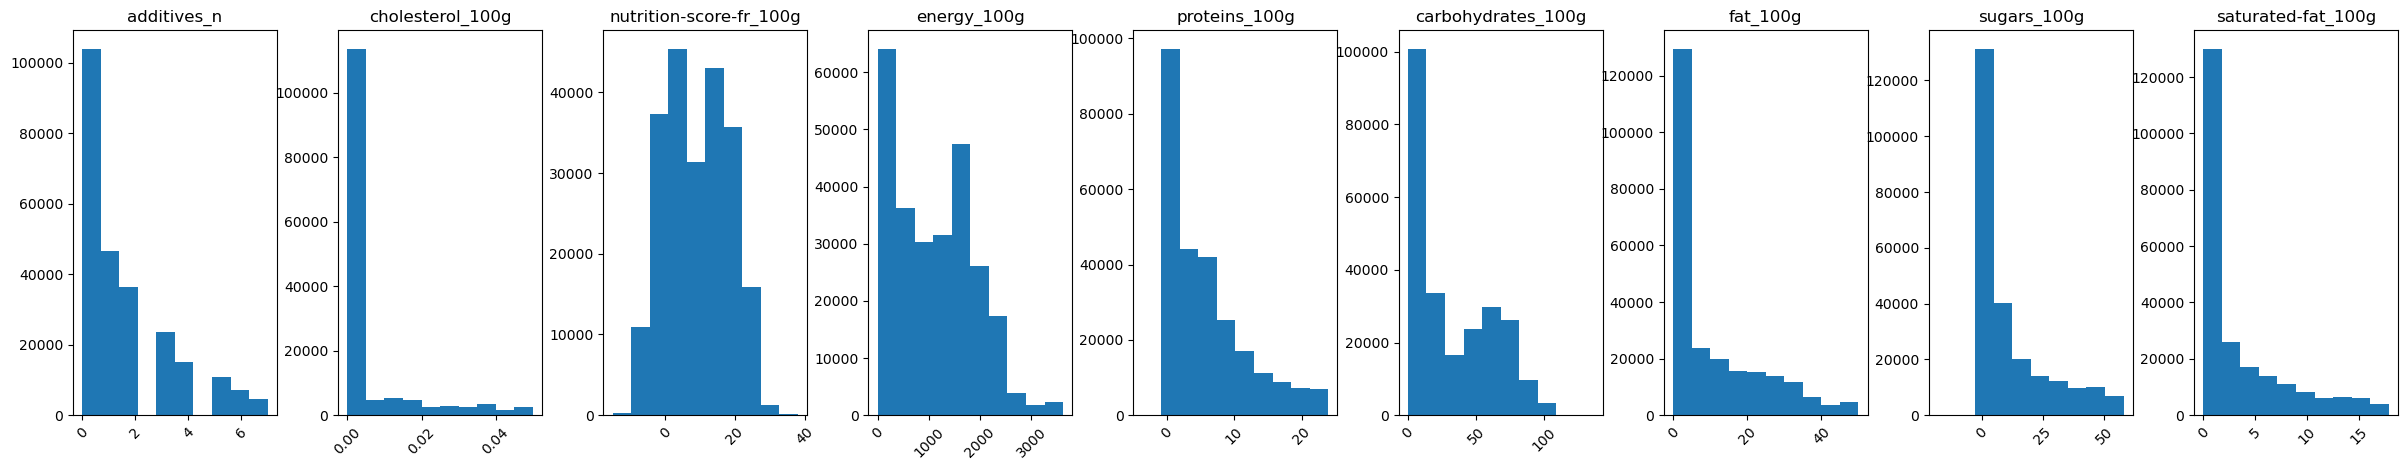

In [9]:
plt.rcdefaults()
plt.rcParams["figure.figsize"] = (100,5)
plt.rcParams["axes.grid"] = False

fig, axes = plt.subplots(nrows=1, ncols=9,figsize=(30,5))

df.hist(figsize=(14,14),ax=axes, xrot=45,grid=False)
plt.show()

On remarque une distribution bimodale sur le nutrition-score-fr_100g
-> on aurant potentiellement deux groupes de produits (ceux avec des scores autour de 0 et ceux autour de 15)

### Nutrition Score et Grade

On cherche ici à savoir si le nutrition-score-fr_100g peut expliquer le nutrition_grade_fr par un essai de modelisation par regression linéaire

In [10]:
df.groupby("nutrition_grade_fr").agg({
    "nutrition-score-fr_100g":"mean"
})

,nutrition-score-fr_100g
nutrition_grade_fr,
a,-3.407644
b,0.906673
c,6.367561
d,14.066934
e,21.958587


In [11]:
# conversion numerique de la note alphabetique de nutrition
gradeNotationMapper={"a":5,"b":4,"c":3,"d":2,"e":1}
nutritionGrade=df['nutrition_grade_fr'] # note alphabetique de nutrition par individu
nutritionNote=nutritionGrade.replace(gradeNotationMapper)
df['nutritionNote']=nutritionNote
dfSub=df[['nutritionNote','nutrition-score-fr_100g']].dropna()

In [12]:
import statsmodels.api as sm

# Centrage Réduction
dfSubStandardized = (dfSub - dfSub.mean()) / dfSub.std()

X = dfSub[['nutrition-score-fr_100g']]
# ajout de la constante explicative
X=sm.add_constant(X)
y=dfSub['nutritionNote']
# definition du modele
model = sm.OLS(y,X)

# fittage du modele
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          nutritionNote   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.398e+06
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:02:39   Log-Likelihood:            -1.0691e+05
No. Observations:              221210   AIC:                         2.138e+05
Df Residuals:                  221208   BIC:                         2.139e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Résultats du calcul de régression linéaire sur 136607 observations:
* $R^2$ elevé => score de prediction elevé
* Coefficient negatif => plus le score est elevé, plus la note est mauvaise (proche de e)
* P-value associé au coefficient teste l'hypothese nulle que le coefficient n'a pas d'effet. Ici il vaut 0, donc le coefficient est pertinent

Représentation graphique des valeurs prédites par le modele par rapport aux données réelles

In [13]:
# valeurs prédites de nutritionNote
results.fittedvalues = results.params['nutrition-score-fr_100g'] * dfSub['nutrition-score-fr_100g'] + results.params['const']
# valeurs résiduelles
results.resid = dfSub['nutritionNote'] - results.fittedvalues
# on ajoute les valeurs prédites dans le dataFrame
dfSub['fitted'] = results.fittedvalues

#dfSub.sort_values(by = 'nutrition-score-fr_100g', ascending = True, inplace = True)

Text(0.5, 1.0, "Regression linéaire \n 'nutritionNote~nutrition-score-fr_100g'")

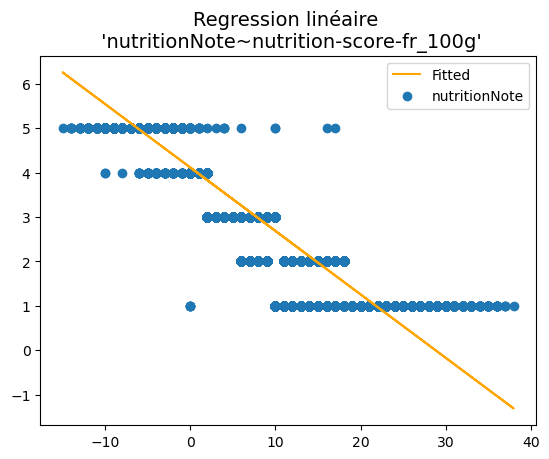

In [14]:
plt.rcdefaults()
plt.scatter(dfSub['nutrition-score-fr_100g'], dfSub['nutritionNote'], label = 'nutritionNote' )
plt.plot(dfSub['nutrition-score-fr_100g'], dfSub['fitted'], label = 'Fitted',color='orange' )
plt.legend()
plt.title("Regression linéaire \n 'nutritionNote~nutrition-score-fr_100g'",fontsize=14,fontweight='normal')

In [15]:
# suppression des valeurs manquantes
dfNutritionScoreGradeComplete=df[['nutrition-score-fr_100g','nutrition_grade_fr']].dropna()

Text(0, 0.5, 'nutrition-score-fr_100g')

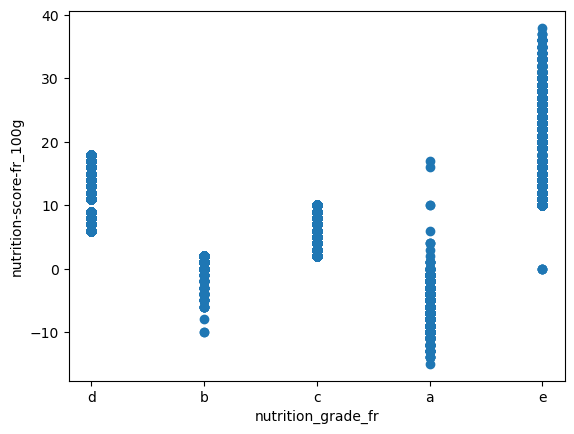

In [16]:
# scatter plot
plt.rcdefaults()
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot('nutrition_grade_fr','nutrition-score-fr_100g','o', linestyle="None",data=dfNutritionScoreGradeComplete)
plt.xlabel("nutrition_grade_fr")
plt.ylabel("nutrition-score-fr_100g")

Le nutrition grade est bon ('a') pour les nutritions score compris entre -15 et 20.
Les mauvais grade ('e') correspondent au nutrition score compris entre 10 et 40.
Cela confirme les resultats précédents, plus le nutrition score est elevé, plus le grade est mauvais.

## <font color=#FB5607>Analyse Multivariee</font>

On constate que le dataframe dfQual contient des centaines de milliers d'observations distinctes par variables.\
La variable "nutrition_grade_fr" presente 5 degré de notation.
Nous voulons voir si la marque (brands) ou les additifs (additives_fr) peuvent expliquer la notation.

In [17]:
# on selectionne les variables qualitatives
dfQual=df[colonnesQual]
dfQual.shape

(320772, 21)

In [18]:
dfQual.describe()

,categories,quantity,countries_fr,categories_tags,categories_fr,states,countries_tags,brands_tags,serving_size,countries,...,main_category_fr,brands,main_category,nutrition_grade_fr,states_fr,additives,creator,product_name,states_tags,additives_fr
count,84410,104819,320492,84389,84411,320726,320492,292352,211331,320492,...,84366,292360,84366,221210,320726,248905,320770,303010,320726,154680
unique,36982,13826,722,21142,21152,1021,725,50253,25423,1434,...,3543,58784,3543,5,1021,196069,3535,221347,1021,41537
top,"Snacks sucrés,Biscuits et gâteaux,Biscuits",500 g,États-Unis,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits","en:to-be-completed, en:nutrition-facts-complet...",en:united-states,carrefour,240 ml (8 fl oz),US,...,Boissons,Carrefour,en:beverages,d,"A compléter,Informations nutritionnelles compl...",[ extra-virgin-olive-oil -> en:extra-virgin-o...,usda-ndb-import,Ice Cream,"en:to-be-completed,en:nutrition-facts-complete...",E322 - Lécithines
freq,301,4669,172998,802,802,168905,172998,3149,5496,169928,...,6054,2978,6054,62763,168905,397,169868,410,168905,8264


Utilisons la regression lineaire par la méthode des moindres carrés pour déterminer si les variables explicatives "brands" et "additives_fr" peuvent expliquer "nutrition_grade_fr"

### Tableau de contingence

Pour pouvoir la corrélation entre ces variables catégorielles, nous calculons le tableau de contingences et traduisons les valeurs de "nutrition_grade_fr" en notes numériques

In [19]:
#%%timeit
tableauContingence=dfQual.groupby("nutrition_grade_fr").agg({
    "brands":"count",
    "additives_fr":"count"
})
tableauContingence

,brands,additives_fr
nutrition_grade_fr,,
a,34975,13239
b,33501,17754
c,44526,25687
d,61526,39721
e,42044,29781


In [20]:
tableauContingence['nutrition_grade_fr']=tableauContingence.index

In [21]:
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='a','nutrition_grade_fr']=0
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='b','nutrition_grade_fr']=1
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='c','nutrition_grade_fr']=2
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='d','nutrition_grade_fr']=3
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='e','nutrition_grade_fr']=4
tableauContingence

,brands,additives_fr,nutrition_grade_fr
nutrition_grade_fr,,,
a,34975,13239,0
b,33501,17754,1
c,44526,25687,2
d,61526,39721,3
e,42044,29781,4


Utilisons la regression lineaire par la méthode des moindres carrés pour déterminer si les variables explicatives "brands" et "additives_fr" peuvent expliquer "nutrition_grade_fr"

In [22]:
import statsmodels.api as sm
X = tableauContingence[['brands','additives_fr']]
X=sm.add_constant(X)
y=tableauContingence['nutrition_grade_fr']
model = sm.OLS(y.astype('int64'),X)

results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     nutrition_grade_fr   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     23.16
Date:                Tue, 09 Mar 2021   Prob (F-statistic):             0.0414
Time:                        15:02:42   Log-Likelihood:               -0.86622
No. Observations:                   5   AIC:                             7.732
Df Residuals:                       2   BIC:                             6.561
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2796      1.160      1.965   

/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


On remarque une valeur Adj.R-Squared très elevée indiquant un fort score de prediction.\
Les coefficients des valeurs explicatives sont proches de 0, avec une p-value proche de 0.05, on ne peut pas expliquer de manière fiable le nutrition_grade_fr par les variables brands et additives_fr

## <font color=#FB5607>ACP</font>

### Preparation des donnees

In [23]:
# filtrage sur les variables quantitatives
dataPCA=df[colonnesNum].dropna()
nomsIndividus=df.iloc[dataPCA.index,df.columns.get_loc('product_name')] # Individus
nutritionGrade=df.iloc[dataPCA.index,df.columns.get_loc('nutrition_grade_fr')] # note alphabetique de nutrition par individu
variables=dataPCA.columns # Variables
X=dataPCA.values # Valeurs

In [24]:
dataPCA.sample(5)

,additives_n,cholesterol_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sugars_100g,saturated-fat_100g
150636,0.0,0.0,11.0,1602.0,3.33,83.33,0.00,20.0,0.00
80289,1.0,0.0,-2.0,753.0,4.00,14.00,14.00,14.0,1.00
151992,1.0,0.0,2.0,628.0,3.00,16.00,10.00,11.0,1.50
104906,2.0,0.0,18.0,1305.0,6.25,56.25,6.25,0.0,6.25
105626,6.0,0.0,13.0,1360.0,5.00,77.50,0.00,45.0,0.00


### Centrage et reduction

In [25]:
from sklearn import preprocessing
from sklearn import decomposition

In [26]:
centreReduit = preprocessing.StandardScaler().fit(X)
XCentreReduit = centreReduit.transform(X)
XCentreReduit.shape

(136607, 9)

### Calcul des composantes principales

In [27]:
n_comp=9 # n_comp <= nombre de variables
pca = decomposition.PCA(n_components=n_comp)
pca.fit(XCentreReduit)

PCA(n_components=9)

### Eboulis des valeurs propres

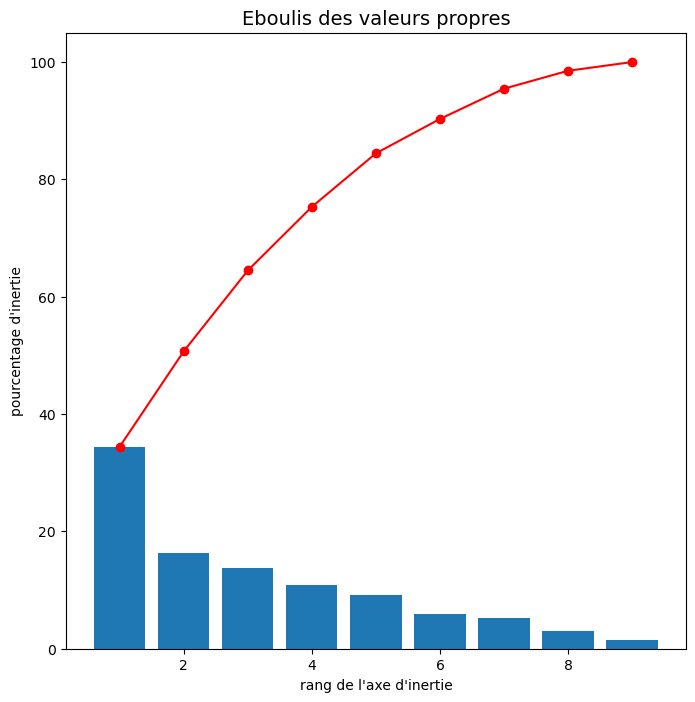

In [28]:
from matplotlib import pyplot as plt

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (8,8)

vectVarianceExpliquee = pca.explained_variance_ratio_*100 # renvoie les variences expliquées pour chacune des dimensions
plt.bar(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee)
plt.plot(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=14,fontweight='normal')
plt.show()

In [29]:
composantesPrincipales = pca.components_ # triés par variance expliquée

### Choix du plan factoriel

In [30]:
# Selection du plan Factoriel
#dimension 1
d1=0
#dimension 2
d2=1

### Cercle des correlations

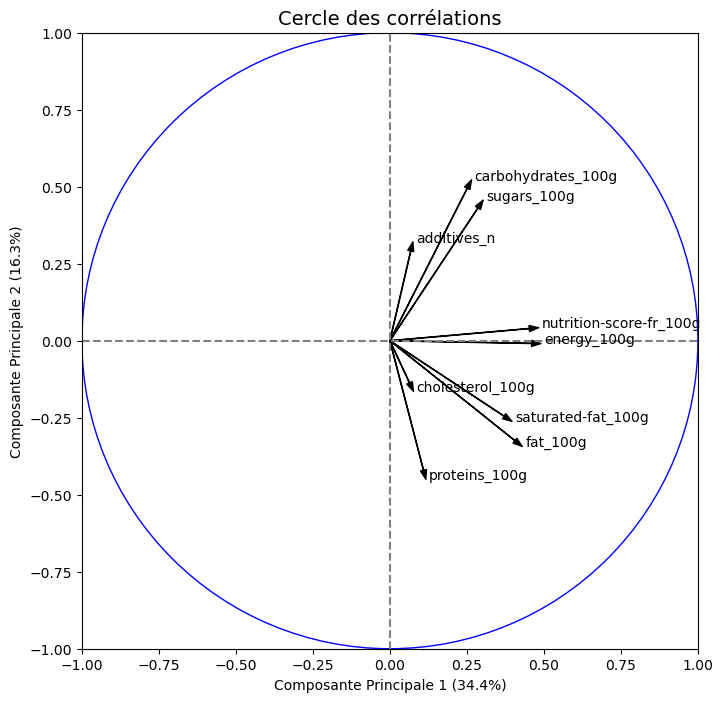

In [31]:
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (8,8)

fig, ax = plt.subplots()

# configuration de la bordure
plt.xlim(-1,1)
plt.ylim(-1,1)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# libelles des axes
plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Cercle des corrélations',color="black",fontsize=14,fontweight='normal')
# afficher le cercle
cercle = plt.Circle((0,0),radius=1, color='b', fill=False)
ax.set_aspect(1)
ax.add_patch(cercle)


#placement des étiquettes des p variables + fleches (partant du centre vers les points projetés)
for i in range(len(variables)):
    plt.annotate(variables[i],xy =(composantesPrincipales[d1][i],composantesPrincipales[d2][i]),xytext =(composantesPrincipales[d1][i]+0.01,composantesPrincipales[d2][i]),arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3")) 
    plt.arrow(0,0,composantesPrincipales[d1][i],composantesPrincipales[d2][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")

### Projection des individus

In [32]:
# Projection des individus sur les composantes principales
XProjete = pca.transform(XCentreReduit)
print(f"dim Projeté:{XProjete.shape}- dim Origine:{XCentreReduit.shape}")

dim Projeté:(136607, 9)- dim Origine:(136607, 9)


In [33]:
# preparation de la palette de couleur qui reprend les codes couleurs hexa du logo nutriscore
custom_palette = {
'd': '#E08530',#Orange
 'c': '#F6CB45',#Jaune
 'e': '#D44B29',#Rouge
 'a': '#387E47',#Vert foncé
 'b': '#91B849' #Vert   
}
custom_palette['a']

'#387E47'

In [34]:
list(custom_palette.keys())

['d', 'c', 'e', 'a', 'b']

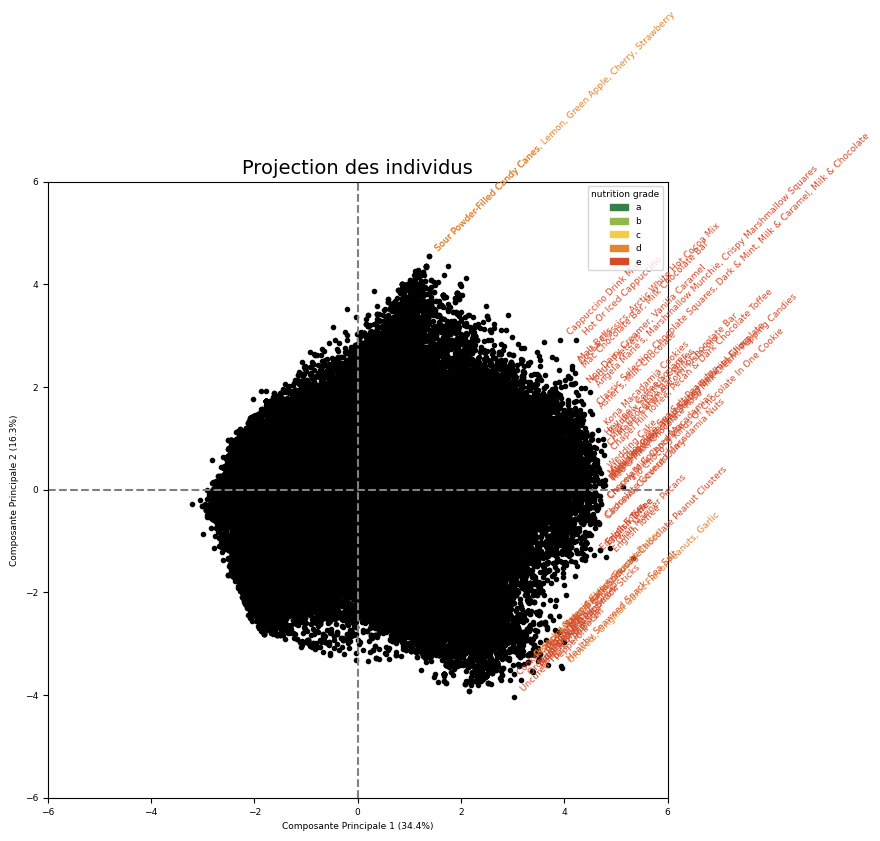

In [35]:
# visualisation
from matplotlib import pyplot as plt

# taille du graphique
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = '6.5'

# configuration de la bordure
plt.xlim(-6,6)
plt.ylim(-6,6)

# affichage des lignes horizontales et verticales
plt.plot([-6, 6], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-6, 6], color='grey', ls='--')

plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Projection des individus',fontsize=14,fontweight='normal')



# representer le nuage projeté sur le 1er plan factoriel (composé des 2 premieres composantes principales 0 et 1)
plt.scatter(XProjete[:,d1],XProjete[:,d2],marker=".",color="black")

for i in range(len(nomsIndividus)):   # nombre d'individus
    
    p=np.array([XProjete[i,d1],XProjete[i,d2]])

    color=nutritionGrade.values[i]

    # on utilise la distance euclidienne pour n'afficher les labels que pour les individus loin du centre
    distance= np.linalg.norm(p-np.array([0,0]))

    if distance>4.7:
        label=nomsIndividus.values[i]
        #print(f"label[{i}]:{label} | test:{not(pd.isnull(label))} | color:{color}") # debug
        if not pd.isnull(label):
            plt.text(XProjete[i,d1]+0.1, XProjete[i,d2]+0.1, label ,rotation=45,color=custom_palette[color])
    #plt.annotate(nomsIndividus.values[i],xy =(XProjete[i,0],XProjete[i,1]),xytext =(XProjete[i,0],XProjete[i,1]))

import matplotlib.patches as mpatches

a_patch = mpatches.Patch(color=custom_palette['a'], label='a')
b_patch = mpatches.Patch(color=custom_palette['b'], label='b')
c_patch = mpatches.Patch(color=custom_palette['c'], label='c')
d_patch = mpatches.Patch(color=custom_palette['d'], label='d')
e_patch = mpatches.Patch(color=custom_palette['e'], label='e')


plt.legend(title="nutrition grade",handles=[a_patch, b_patch, c_patch, d_patch, e_patch])

#import os
#os.system('say "jai fini de dessiner"')

Observations:
* sur l'axe du nutrition score, la note de nutrition ne semble pas correlee
* la composante energy / nutrition_score explique toute seule une composante
* sugars et carbohydrates (glucides) expliquent fortement l'axe vertical positif
* le gras explique modéremment l'axe vertical negatif en opposition avec les glucides/sucres

In [36]:
time.time() - now

16.201021194458008

## <font color=#FB5607>Conclusion</font>

On peut distinguer 3 axes de pour definir la qualité nutritionnelle d'un produit alimentaire:
* les aliments riches en protéines
* les aliments riches en sucre lent/rapide
* les aliments energetiques